# OMIS 114 Data Science with Python
## Assignment 2 - Time Series Analysis I

#### Due January 28 at 3:50PM :: 100 Points Total - 66 Points for Camino Quiz; 34 Points for Jupyter Notebook

**Description:**<br>The file 'AAPL.csv' contains about 40 years of Apple daily stock price information.<br>Perform an analysis of the Apple stock price time series.<br>Prepare this Jupyter notebook file to professionally present your time series analysis.

<ul>
<li>Expand the notebook (insert cells) as required.</li>
<li>To respond to the questions in this noteboook, generate a response in the cell immediately following a question.</li>
<li>Complete the associated quiz on Camino.</li>
<li>The points associated with the assignment questions are earned by computing and providing the correct (expected) solution values on the Camino quiz.</li>
<li>Progress points are associated with an analysis task, and are assigned based upon an assessment of the progress made toward performing the analysis task completely and correctly and generating the correct solution values.</li>
<li>Performing an analysis task correctly and generating the correct solution values earns complete progress points.</li>
<li>Up to 5 progress points for notebook presentation, professionalism, and description of analysis steps (comments).</li>
</ul>

<ul>
<li>Include all steps of the analysis in the submitted notebook.</li>
<li>To earn points on a question, the notebook analysis must compute the value provided.</li>
<li>Include a comment describing each step of the analysis.</li>
<li>The analysis code should also function on any other similar stock data.</li>
<li>Additional Python packages (besides those imported) may not be used in the analysis.</li>
<li>For loops may not be used in the analysis.</li>
<li>Complete this assignment independently, without inappropriate collaboration or assistance.</li>
</ul>

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np

**Directions:**<br>The 'AAPL.csv' file contains 5 columns of interest in the analysis: 'Open', 'Close', 'High', 'Low', and 'Volume'. Ignore the 'Adj Close' column.<br>These columns correspond to the price at market open, price at market close, intraday high trading price, intraday low trading price, and trading volume (number of shares traded) of the Apple stock for a specific trading day.<br>Rows correspond to a trading day (day that the stock market is open and Apple stock is being traded by investors).<br>Create 5 series objects based upon the 5 columns in the 'AAPL.csv' file - 'Open', 'Close', 'High', 'Low', and 'Volume'.

In [4]:
data = pd.read_csv('AAPL.csv',index_col=0, parse_dates=True)

stock_o = data['Open']
stock_c = data['Close']
stock_h = data['High']
stock_l = data['Low'] 
stock_v = data['Volume']

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


#### Question 1: How many trading days are included in the stock price time series?<br><br>5 points

In [6]:
len(data) #gets length of data

9859

#### Question 2: What was the stock price at market open on 2015-07-01?<br><br>(Evaluate the stock price at market open ('stock_o') time series.)<br><br>5 points

In [7]:
stock_o['2015-07-01'] #gets the value from stock_o time series on 2015-07-01

126.900002

#### Question 3: What was the average stock price at market close ('close' price) during the first quarter of 2018 (trading days 2018-01-01 to 2018-03-31, inclusive)?<br><br>(Evaluate the stock price at market close ('stock_c') time series.)<br><br>6 points

In [8]:
stock_c['2018-01-01' : '2018-03-31'].mean() #averages the stock close price from 2018-01-01 to 2018-03-31

172.19131165573774

#### Question 4: Based upon the intraday high trading price and intraday low trading price, what are the 5 trading days with the greatest intraday variation in stock price?  The variation in stock price in a trading day is the intraday high trading price minus the intraday low trading price.<br><br>(Evaluate the intraday high trading price ('stock_h') and intraday low trading price ('stock_l') time series.)<br><br>Output the dates and top 5 greatest variations in stock price.<br><br>6 points

In [9]:
(stock_h - stock_l).nlargest(5) #takes the high point of stock price = lowest point of stock price, then prints the largest 5

Date
2015-08-24    16.800003
2018-10-29    13.600006
2019-10-31    11.910003
2019-08-13    11.660003
2019-08-01    11.289994
dtype: float64

#### Question 5: Plot the stock price at market close ('stock_c') time series in a line plot.<br><br>Place the stock price at market close on the Y axis, and the trading day on the X axis.<br><br>5 points

<AxesSubplot:xlabel='Date'>

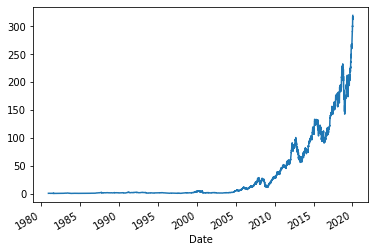

In [10]:
stock_c.plot() #plots stock closing price

#### Question 6: On how many trading days did the stock price close below 50?<br><br>(Evaluate the stock price at market close ('stock_c') time series.)<br><br>6 points

In [11]:
stock_c.index[stock_c.values < 50] #gets the index for closing values under 50 from stock_c time series
#count given in the descriptor line of output = 7682

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2011-06-21', '2011-06-22', '2011-06-23', '2011-06-24',
               '2011-06-27', '2011-06-28', '2011-06-29', '2011-06-30',
               '2011-07-01', '2011-07-05'],
              dtype='datetime64[ns]', name='Date', length=7682, freq=None)

#### Question 7: On which trading day did the stock price close over 50 for the first time?<br><br>(Evaluate the stock price at market close ('stock_c') time series.)<br><br>Output the date (or timestamp).<br><br>6 points

In [12]:
stock_c.index[stock_c.values > 50][0] #gets the first index for closing values over 50 from stock_c time series

Timestamp('2011-02-07 00:00:00')

#### Question 8: Focus exclusively on the trading days when the stock price closed over 50.  On how many of these trading days did the stock trading volume (number of shares traded) exceed 100 million?<br><br>(Evaluate the stock price at market close ('stock_c') and trading volume ('stock_v') time series.)<br><br>6 points for result; plus up to 4 progress points

In [13]:
stock_v.index[(stock_v.values > 1e+8) & (stock_c.values > 50)] #gets the index for volumn values over 100 million and closing price values over 50
#count given in the descriptor line of output = 399

DatetimeIndex(['2011-02-07', '2011-02-09', '2011-02-10', '2011-02-16',
               '2011-02-17', '2011-02-18', '2011-02-28', '2011-03-02',
               '2011-03-03', '2011-03-04',
               ...
               '2015-07-22', '2015-08-04', '2015-08-12', '2015-08-21',
               '2015-08-24', '2015-08-25', '2016-01-27', '2016-04-27',
               '2016-09-14', '2017-02-01'],
              dtype='datetime64[ns]', name='Date', length=404, freq=None)

#### Question 9: On which trading days prior to the year 2014 (trading days preceding 2014-01-01) did the stock price close over 100?<br><br>(Evaluate the stock price at market close ('stock_c') time series.)<br><br>Output the dates and close prices.<br><br>6 points for result; plus up to 4 progress points

In [14]:
stock_c[(stock_c.values > 100) & (stock_c.index < '2014-01-01')] #gets the index for closing price values over 100 and time value before 2014
#3

Date
2012-09-18    100.272858
2012-09-19    100.300003
2012-09-21    100.012856
Name: Close, dtype: float64

#### Question 10: Focus exclusively on the trading days when the stock price closed over 100.  What are the 5 trading days with the largest stock trading volumes (number of shares traded)?<br><br>(Evaluate the stock price at market close ('stock_c') and trading volume ('stock_v') time series.)<br><br>Output the dates and top 5 largest trading volumes.<br><br>6 points for result; plus up to 4 progress points

In [19]:
stock_v[(stock_c.values > 100)].nlargest(5) #gets both index and values for the 5 largest volumns from stock_v where closing values are over 100


Date
2015-08-24    162206300.0
2015-01-28    146477100.0
2012-09-21    142897300.0
2015-08-21    128275500.0
2015-08-04    124138600.0
Name: Volume, dtype: float64

#### Question 11: Focus exclusively on the 5 trading days identified in question 10 (trading days when the stock price closed over 100 with top 5 largest trading volumes).  What are the stock prices at market close for these 5 trading days?<br><br>(Evaluate the stock price at market close ('stock_c') and trading volume ('stock_v') time series.)<br><br>Output the dates and close prices, sorted with the largest close price listed first.<br><br>7 points for result; plus up to 6 progress points

In [21]:
stock_c[stock_v[(stock_c.values > 100)].nlargest(5).index].nlargest() 
#gets both index and stock closing price for top 5 largest trading volumns AND closing price over 100

Date
2015-01-28    115.309998
2015-08-04    114.639999
2015-08-21    105.760002
2015-08-24    103.120003
2012-09-21    100.012856
Name: Close, dtype: float64

#### Question 12: Focus exclusively on the 5 trading days identified in question 10 (trading days when the stock price closed over 100 with top 5 largest trading volumes).  On which of these trading days did the stock price lose the most in value from market open to market close?  The greatest loss in a trading day is the largest value when stock price at market close is subtracted from stock price at market open.<br><br>(Evaluate the stock price at market open ('stock_o'), stock price at market close ('stock_c') and trading volume ('stock_v') time series.)<br><br>Output the date (or timestamp) of the greatest loss in value from market open to market close.<br><br>7 points for result; plus up to 6 progress points

In [22]:
(stock_o[stock_v[(stock_c.values > 100)].nlargest(5).index] - stock_c[stock_v[(stock_c.values > 100)].nlargest(5).index]).nlargest(1).index
#gets the date with the largest difference between stock open prices and stock close prices, which indicates the greatest loss for the top 5 largest trading volumn days where the price closed at more than 100

DatetimeIndex(['2015-08-21'], dtype='datetime64[ns]', name='Date', freq=None)